GME csv

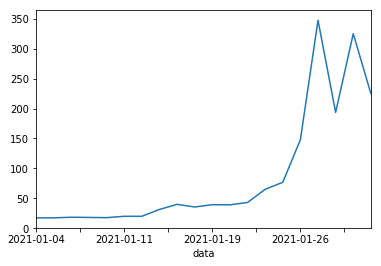

In [14]:
import pandas as pd
from datetime import datetime

# get data
url = 'https://drive.google.com/file/d/18geq8yTm0F7d3GRmvvMToIZGZyDUyeiv/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df=pd.read_csv(path, index_col=0)
df['close'].plot()

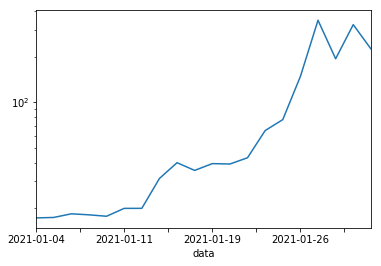

In [15]:
#log
df['close'].plot(logy=True)

In [16]:
#n shares outstanding GME
nshares = 69750000
#short ratio
sr = 1.4
#avg_short_entry
short_entry_price = 20
#billion
billion = 1000000000

df['loss'] = sr * nshares * (df['close'] - short_entry_price) / billion
df[['close', 'loss']].tail(5)

,close,loss
data,,
2021-01-26,147.98,12.497247
2021-01-27,347.51,31.981351
2021-01-28,193.60,16.952040
2021-01-29,325.00,29.783250
2021-02-01,225.00,20.018250


In [21]:
#stosunek dzienny obrot do calkowitej liczby akcji
df['vol_pct'] = round(100 * df['vol'] / nshares, 2)
df[['close', 'vol', 'vol_pct']].tail(10)

,close,vol,vol_pct
data,,,
2021-01-19,39.36,74721924.0,107.13
2021-01-20,39.12,33471789.0,47.99
2021-01-21,43.03,57079754.0,81.83
2021-01-22,65.01,194084194.0,278.26
2021-01-25,76.79,177874000.0,255.02
2021-01-26,147.98,161894423.0,232.11
2021-01-27,347.51,90516825.0,129.77
2021-01-28,193.60,58815805.0,84.32
2021-01-29,325.00,49414294.0,70.84


rejestr krótkiej sprzedaży KNF

In [33]:
# get data
url = 'https://drive.google.com/file/d/1AMhbpBnihBkK6aWZK8oFWzEiJYvOItIV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path, header=4, delimiter=';', encoding='latin-1')
df.columns = ['kto', 'ticker', 'isin', 'short_size', 'Data']
df['Data'] = pd.to_datetime(df['Data'])
df.set_index(df['Data'], drop=True, inplace=True)
df.sort_index(inplace=True)
#clean < 0,5. <- zamieniamy na 0 #to niedokladne
df['short_size'] = df['short_size'].apply(lambda x: float(x.replace('< 0,5', '0').replace(',', '.')))
display(df.tail(10))

,kto,ticker,isin,short_size,Data
Data,,,,,
2021-01-14,"Eminence Capital, LP",CDPROJEKT,PLOPTTC00011,0.82,2021-01-14
2021-01-15,Marshall Wace LLP,CDPROJEKT,PLOPTTC00011,0.61,2021-01-15
2021-01-22,Marshall Wace LLP,CDPROJEKT,PLOPTTC00011,0.58,2021-01-22
2021-01-25,Melvin Capital Management LP,CDPROJEKT,PLOPTTC00011,1.05,2021-01-25
2021-01-26,Melvin Capital Management LP,CDPROJEKT,PLOPTTC00011,0.99,2021-01-26
2021-01-27,Marshall Wace LLP,CDPROJEKT,PLOPTTC00011,0.00,2021-01-27
2021-01-27,"Eminence Capital, LP",CDPROJEKT,PLOPTTC00011,0.00,2021-01-27
2021-01-27,Egerton Capital (UK) LLP,CDPROJEKT,PLOPTTC00011,0.00,2021-01-27
2021-01-28,"LIGHT STREET CAPITAL MANAGEMENT, LLC",CDPROJEKT,PLOPTTC00011,0.79,2021-01-28


dane GPW archiwum

In [39]:
#CLOSE data CDPROJEKT
nshares = 100654624

#CDR data
url = 'https://drive.google.com/file/d/19td5P6QfVJRdaru5EtyCy7pYpii07NGy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dc = pd.read_csv(path)
dc.index = pd.to_datetime(dc['Data'])
dc.sort_index(inplace=True)
dc.rename(columns = {'Kurs otwarcia':'open', 'Kurs zamknięcia':'close', 'Wolumen':'vol'}, inplace = True)

estymacja short position

In [41]:
#prep short_size summary
dc['short_size'] = 0
for kto in df['kto'].unique():
    #print(df['short_size'][df['kto']==kto])
    tmp = pd.concat([dc['close'], df['short_size'][df['kto']==kto]], axis=1)
    tmp['short_size'].fillna(method='ffill', inplace=True)
    tmp['short_size'].fillna(0, inplace=True)
    tmp.dropna(subset=['close'], inplace=True)
    dc['short_size'] = dc['short_size'] + tmp['short_size'].to_numpy()

print()
print('Wartosc short_size z ostatniego dnia jest tak naprawde nieznana - zostanie ogloszona next biz day. najprawdopodobniej < 0.5')
display(dc.tail(7))


Wartosc short_size z ostatniego dnia jest tak naprawde nieznana - zostanie ogloszona next biz day. najprawdopodobniej < 0.5


,Data,open,close,vol,vol_pct,short_size
Data,,,,,,
2021-01-21,2021-01-21,255.0,253.2,901494,0.90,3.88
2021-01-22,2021-01-22,252.0,250.1,519925,0.52,3.85
2021-01-25,2021-01-25,252.0,275.7,1607105,1.60,3.78
2021-01-26,2021-01-26,273.1,300.0,2679833,2.66,3.72
2021-01-27,2021-01-27,308.0,315.8,5869312,5.83,1.79
2021-01-28,2021-01-28,311.2,365.0,6857539,6.81,0.79
2021-01-29,2021-01-29,354.0,305.2,2947173,2.93,0.79


plot

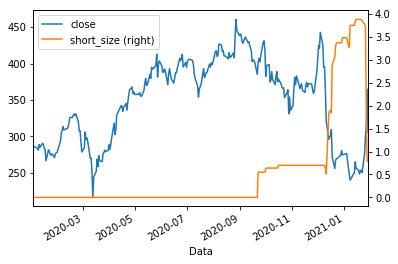

In [42]:
dc['close'].plot(legend=True)
dc['short_size'].plot(legend=True, secondary_y=True)

correlation heat map

<AxesSubplot:>

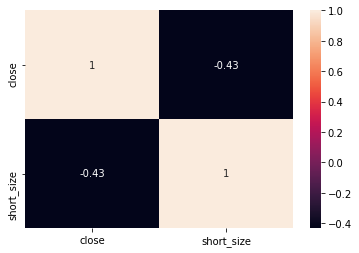

In [149]:
import seaborn as sns

# calculate the correlation matrix
corr = dc[['close', 'short_size']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)

TEMPERATURA. Dane z NOAA.

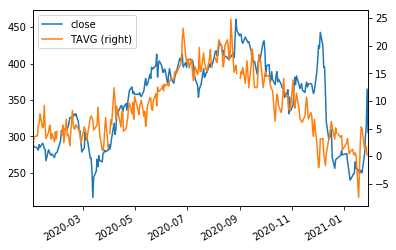

In [45]:
url = 'https://drive.google.com/file/d/1GB_d25HaVaYuL43NrcmN9OQLNh7d9JFY/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

#read TEMP data
dt = pd.read_csv(path, index_col=0)
dt.index = pd.to_datetime(dt.index)

#concatenate with CDR data
new = pd.concat([dc, dt['TAVG']], axis=1).dropna(subset=['close'])
new['close'].plot(legend=True)
new['TAVG'].plot(legend=True, secondary_y=True)

<AxesSubplot:>

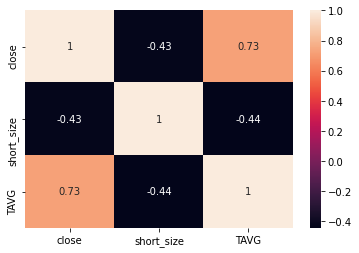

In [164]:
import seaborn as sns

# calculate the correlation matrix
corr = new[['close', 'short_size', 'TAVG']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)

BONUS: kto ile wtopił

In [47]:
# get data
url = 'https://drive.google.com/file/d/1AMhbpBnihBkK6aWZK8oFWzEiJYvOItIV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path, header=4, delimiter=';', encoding='latin-1')
df.columns = ['kto', 'ticker', 'isin', 'short_size', 'Data']
df.index = pd.to_datetime(df['Data'])
df.sort_index(inplace=True)
#clean < 0,5. <- zamieniamy na 0 #to niedokladne
df['short_size'] = df['short_size'].apply(lambda x: float(x.replace('< 0,5', '0').replace(',', '.')))
#prep short_size summary
dc['short_size'] = 0
for kto in df['kto'].unique():
    #print(df['short_size'][df['kto']==kto])
    tmp = pd.concat([dc['close'], df['short_size'][df['kto']==kto]], axis=1)
    tmp['short_size'].fillna(method='ffill', inplace=True)
    tmp['short_size'].fillna(0, inplace=True)
    tmp.dropna(subset=['close'], inplace=True)
    dc['short_size'] = dc['short_size'] + tmp['short_size'].to_numpy()

    avg_price = (dc['close'] + dc['open']) / 2
    shares_bought_sold = nshares * tmp['short_size'].diff().fillna(0) / 100
    #wycena pakietu, jesli jeszcze pozostal
    if not tmp['short_size'][-1] == 0:
        shares_bought_sold[-1] = -nshares * tmp['short_size'][-1] / 100
    package_val = shares_bought_sold * avg_price
    
    print('%s:  profit/loss:%.2f mln' %(kto, sum(package_val)/1000000))

Menta Capital LLC:  profit/loss:0.00 mln
Millennium International Management LP:  profit/loss:0.00 mln
Marshall Wace LLP:  profit/loss:12.58 mln
DNB Asset Management AS:  profit/loss:0.00 mln
Melvin Capital Management LP:  profit/loss:-24.39 mln
Eminence Capital, LP:  profit/loss:-30.07 mln
LIGHT STREET CAPITAL MANAGEMENT, LLC:  profit/loss:-52.03 mln
Egerton Capital (UK) LLP:  profit/loss:-35.66 mln
